In [18]:
import sys  
sys.path.insert(0, '../code')
import deep_tree
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [19]:
# 1000 x 2 ==> batch x features
x = th.rand([1000, 2])
x[:, 0] *= 2*pi
x[:, 0] -= pi
x[:, 1] *= 3
x[:, 1] -= 1.5

# Labels
y = (th.sin(x[:, 0]) < x[:, 1]).long()

# Subset map. Will be randomized when we use the RF
features = {
    15: th.tensor([0, 1]),
    14: th.tensor([0, 1]),
    13: th.tensor([0, 1]),
    12: th.tensor([0, 1]),
    11: th.tensor([0, 1]),
    10: th.tensor([0, 1]),
    9: th.tensor([0, 1]),
    8: th.tensor([0, 1]),
    7: th.tensor([0, 1]),
    6: th.tensor([0, 1]),
    5: th.tensor([0, 1]),
    4: th.tensor([0, 1]),
    3: th.tensor([0, 1]),
    2: th.tensor([0, 1]),
    1: th.tensor([0, 1])
}

In [20]:
model = deep_tree.Node(features, 10, 4, 1)

In [21]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
x = x.to(device)
y = y.to(device)

In [22]:
optimizer = th.optim.Adam(model.parameters())
for i in range(2000):
    model.populate_best(x[:900, :], y[:900])
    optimizer.zero_grad()

    loss = model.loss(x[:900, :], y[:900], th.tensor([0], dtype=th.float32).to(device), device)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())))

====EPOCH 0====
Acc: tensor(0.8322)
Loss: tensor([21.7709], grad_fn=<AddBackward0>)
====EPOCH 100====
Acc: tensor(0.9144)
Loss: tensor([20.7130], grad_fn=<AddBackward0>)
====EPOCH 200====
Acc: tensor(0.9056)
Loss: tensor([20.5827], grad_fn=<AddBackward0>)
====EPOCH 300====
Acc: tensor(0.9100)
Loss: tensor([20.0649], grad_fn=<AddBackward0>)
====EPOCH 400====
Acc: tensor(0.9233)
Loss: tensor([21.2208], grad_fn=<AddBackward0>)
====EPOCH 500====
Acc: tensor(0.9378)
Loss: tensor([21.1379], grad_fn=<AddBackward0>)
====EPOCH 600====
Acc: tensor(0.9478)
Loss: tensor([21.0657], grad_fn=<AddBackward0>)
====EPOCH 700====
Acc: tensor(0.9544)
Loss: tensor([20.9553], grad_fn=<AddBackward0>)
====EPOCH 800====
Acc: tensor(0.9667)
Loss: tensor([20.7312], grad_fn=<AddBackward0>)
====EPOCH 900====
Acc: tensor(0.9800)
Loss: tensor([20.9585], grad_fn=<AddBackward0>)
====EPOCH 1000====
Acc: tensor(0.9889)
Loss: tensor([20.9171], grad_fn=<AddBackward0>)
====EPOCH 1100====
Acc: tensor(0.9911)
Loss: tensor([20

tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])


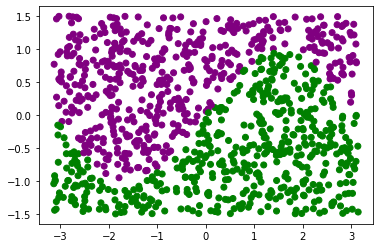

In [23]:
print(y[:15])
print(model.forward(x, device)[:15].long())
cdict = {0: 'green', 1: 'purple'}
plt.scatter(x[:, 0], x[:, 1], c=[cdict[i] for i in model.forward(x, device).cpu().numpy()])
plt.show()

In [24]:
mlp = nn.Sequential(
    nn.Linear(2, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 2),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
for i in range(1000):
    optimizer.zero_grad()

    preds = mlp(x[:900, :])
    loss = nn.functional.cross_entropy(preds, (y[:900].type(th.LongTensor)).to(device))
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())))

====EPOCH 0====
Acc: tensor(0.6500)
Loss: tensor(0.6896, grad_fn=<NllLossBackward>)
====EPOCH 100====
Acc: tensor(0.8200)
Loss: tensor(0.5412, grad_fn=<NllLossBackward>)
====EPOCH 200====
Acc: tensor(0.8800)
Loss: tensor(0.4226, grad_fn=<NllLossBackward>)
====EPOCH 300====
Acc: tensor(0.9100)
Loss: tensor(0.3905, grad_fn=<NllLossBackward>)
====EPOCH 400====
Acc: tensor(0.9700)
Loss: tensor(0.3689, grad_fn=<NllLossBackward>)
====EPOCH 500====
Acc: tensor(0.9800)
Loss: tensor(0.3544, grad_fn=<NllLossBackward>)
====EPOCH 600====
Acc: tensor(0.9900)
Loss: tensor(0.3445, grad_fn=<NllLossBackward>)
====EPOCH 700====
Acc: tensor(0.9800)
Loss: tensor(0.3374, grad_fn=<NllLossBackward>)
====EPOCH 800====
Acc: tensor(0.9800)
Loss: tensor(0.3328, grad_fn=<NllLossBackward>)
====EPOCH 900====
Acc: tensor(0.9800)
Loss: tensor(0.3296, grad_fn=<NllLossBackward>)
FINAL ACC: tensor(0.9800)


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x[:900, :].numpy(), y[:900].numpy())
print(clf.score(x[900:, :].numpy(), y[900:].numpy()))

0.97
